# Подсчет колоний в чашек петри

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.isinteractive()

True

Загрузка изображения 

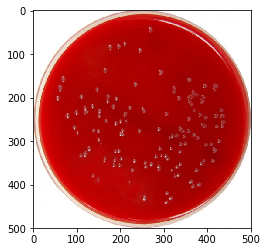

In [28]:
u1='plosPicHQ/neisseria_gonorrhoeae.jpg'  # можете задать путь к другому файлу
I=imread(u1)

imshow(I);

Загрузили и проанализировали изображение. На картинке красный фон, поэтому нужно проверить 3 канал, для того, чтобы выбрать нужный.

In [29]:
F=I[100:400, 100:400]
F.shape


(300, 300, 3)

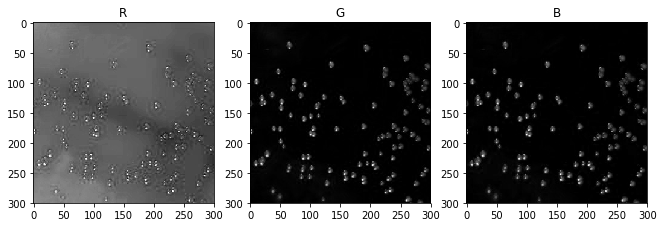

In [30]:
RGB='RGB'
figsize(11,4)
for i in range(F.shape[2]):
    subplot(1,F.shape[2], i+1)
    imshow(F[:,:,i], cmap='gray'); title(RGB[i])

Самый чистый и четкий - второй канал, поэтому  будем использовать его. Колонии белые на агаре и соответственно, инвертировать не нужно.

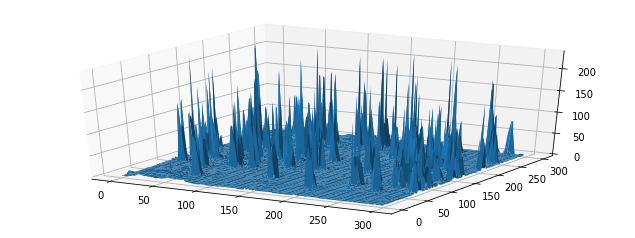

In [21]:
Z=F[:,:,1]

from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = meshgrid(arange(300), arange(300))
ax.plot_surface(X,Y,Z);

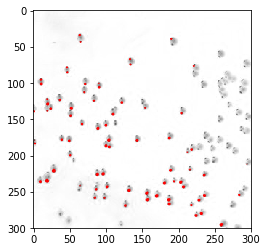

In [31]:
imshow(Z, cmap='gray_r');
coco=contour(Z, 1, colors='r') 

In [32]:
n=len(coco.allsegs[0])
n

74

Так как для данного вида колоний характерен блеск, то эти участки выступают в роли бликов. Алгоритм определил неправильно и принял блики за колонии.

In [25]:
import scipy.ndimage as ndimage

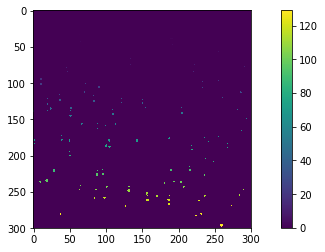

In [35]:
Zf = ndimage.gaussian_filter(Z, 0.01)

porog = Z.max()/2 
labeled, n = ndimage.label(Zf > porog)
imshow(labeled); colorbar();

Так как большое колличество недостоверных данных (количество колоний), можно точно сказать, что сглаживание не принесёт никакого результата.

Вывод:Мы предварительно проанализировали  подготовленные изображения.Далее выбрали канал, самый чистый и четкий - второй канал, поэтому  использовали его. Алгоритм определил неправильно и принял блики за колонии. поэтому полученные данные являються недостоверными. Возможно стоило взять другой участок колонии, для получения нужных результатов, а возможно всему виной качество фотографии.